# ANALYZE A/B TEST RESULTS 


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusions](#conclusions)


<a id='intro'></a>
### INTRODUCTION

A/B tests are very commonly performed by data analysts and data scientists.  

The purpose of this project was to understand the results of an A/B test run by an e-commerce website.
The outcomes of this analysis help to make a decision whether the company should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
### PART I - PROBABILITY

To get started, let's import our libraries.

In [389]:
# The following libraries are being imported
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure we get the same answers as Udacity
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.

a. Read in the dataset and take a look at the top few rows here:

In [390]:
# loading data and reading a few lines
df = pd.read_csv(r"D:\2018_TIME_TO_CHANGE\UDACITY\PART 3 (Practical Statistics)\Project\ab_data.csv")
df.head(5)
# converted indicates a reaction (decided to pay or not)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [391]:
df.shape[0]
print ("THERE ARE %s ROWS IN THE GIVEN DATASET" %df.shape[0])

THERE ARE 294478 ROWS IN THE GIVEN DATASET


c. The number of unique users in the dataset.

In [392]:
df.user_id.nunique()
print ("THERE ARE %s UNIQUE USERS IN THE GIVEN DATASET" %df.user_id.nunique())

THERE ARE 290584 UNIQUE USERS IN THE GIVEN DATASET


It means that there are some users who visited website several times.

d. The proportion of users converted.

In [393]:
prop_conv = len(df.query("converted == 1")) / df.shape[0]
print ("THE PROPORTION OF USERS CONVERTED IS %s" %prop_conv)

THE PROPORTION OF USERS CONVERTED IS 0.11965919355605512


In [394]:
# another technique how we can calculate the proportion of unique users converted is presented below
mydict = dict()
for index, row in df.iterrows():
    if row["converted"] == 1:
        mydict[row["user_id"]] = 1
# id is a key in dictionary

In [395]:
len(mydict)
proportion = len(mydict) / df.user_id.nunique()
print ("THE PROPORTION OF UNIQUE USERS CONVERTED IS %s" %proportion)

THE PROPORTION OF UNIQUE USERS CONVERTED IS 0.12104245244060237


e. The number of times the `new_page` and `treatment` don't line up.

In [396]:
number = len(df.query("landing_page == 'new_page' and group != 'treatment'")) + len(df.query("landing_page == 'old_page' and group != 'control'"))
print ("THE NUMBER OF TIMES THE NEW PAGE AND TREATMENT GROUP DON'T LINE UP IS %s" %number)

THE NUMBER OF TIMES THE NEW PAGE AND TREATMENT GROUP DON'T LINE UP IS 3893


f. Do any of the rows have missing values?

In [397]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

In [398]:
print ("THE ARE NO ROWS THAT HAVE MISSING VALUES")

THE ARE NO ROWS THAT HAVE MISSING VALUES


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page. 

a. Let's create a new dataset that meets all the requirements.  The new dataframe will be stored as **df2**.

In [399]:
# create a new dataframe
df2 = df.query("landing_page == 'new_page' and group == 'treatment' or landing_page == 'old_page' and group == 'control'")

In [400]:
# Double check if all of the incorrect rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [401]:
len(df2.query("landing_page == 'new_page' and group != 'treatment' or landing_page == 'old_page' and group != 'control'"))
# It shows that exactly those rows which don't line up were removed

0

`3.` 

a. How many unique **user_id**s are in **df2**?

In [402]:
df2.user_id.nunique()
print ("THERE ARE %s OF UNIQUE USER IDs" %df2.user_id.nunique())

THERE ARE 290584 OF UNIQUE USER IDs


b. There is one **user_id** repeated in **df2**.  What is it?

In [403]:
# Accessing information about duplicated user id
df2[df2["user_id"].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

This user is in a treatment group that had access to new landing page but has not converted.

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [404]:
# We shouldn't be counting the same user more than once. So, we remove that row
df2 = df2.drop([2893])

In [405]:
# check if that row was deleted
df2[df2["user_id"].duplicated() == True]

,user_id,timestamp,group,landing_page,converted


`4.` 

a. What is the probability of an individual converting regardless of the page they receive?

In [406]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [407]:
df2.converted.mean()
print ("PROBABILITY OF CONVERTING REGARDLESS OF PAGE IS %s" %df2.converted.mean())

PROBABILITY OF CONVERTING REGARDLESS OF PAGE IS 0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [408]:
control_conv = len(df2.query("group == 'control' and converted == 1")) / len(df2.query("group == 'control'"))
print("GIVEN AN INDIVIDUAL WAS IN THE CONTROL GROUP, THE PROBABILITY OF CONVERTING IS %s" %control_conv)

GIVEN AN INDIVIDUAL WAS IN THE CONTROL GROUP, THE PROBABILITY OF CONVERTING IS 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [409]:
treatment_conv = len(df2.query("group == 'treatment' and converted == 1")) / len(df2.query("group == 'treatment'"))
print("GIVEN AN INDIVIDUAL WAS IN THE TREATMENT GROUP, THE PROBABILITY OF CONVERTING IS %s" %treatment_conv)

GIVEN AN INDIVIDUAL WAS IN THE TREATMENT GROUP, THE PROBABILITY OF CONVERTING IS 0.11880806551510564


In [410]:
# another way how to check this is by calling a describe function
df2.groupby("group").describe()

converted                                                user_id  \
              count      mean       std  min  25%  50%  75%  max     count   
group                                                                        
control    145274.0  0.120386  0.325414  0.0  0.0  0.0  0.0  1.0  145274.0   
treatment  145310.0  0.118808  0.323564  0.0  0.0  0.0  0.0  1.0  145310.0   

                                                                       \
                    mean           std       min        25%       50%   
group                                                                   
control    788164.072594  91287.914601  630002.0  709279.50  788128.5   
treatment  787845.719290  91161.564429  630000.0  708745.75  787876.0   

                                
                 75%       max  
group                           
control    867208.25  945998.0  
treatment  866718.75  945999.0

d. What is the probability that an individual received the new page?

In [411]:
receive_new = len(df2.query("landing_page == 'new_page'")) / df2.shape[0]
print ("THE PROBABILITY OF RECEIVING THE NEW PAGE IS %s" %receive_new)

THE PROBABILITY OF RECEIVING THE NEW PAGE IS 0.5000619442226688


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Our dataset consists of the users from both control and treatment groups. <br>
The probabilities of being in a particular group and receive a particular page are the same.** <br>
**The probability of conversion in the control group is 12.04% which is 0.16% higher comparing to the probability of conversion in the treatment group.** <br>
**This indicates that the old page is no worse than the new one and even slightly better.**

<a id='ab_test'></a>
### PART II - A/B TEST

We have noticed that because of the time stamp associated with each event, the company could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do we stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, let's consider we need to make the decision just based on all the data provided.  If we want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, the following null and alternative hypotheses will be used: 

where **$p_{old}$** and **$p_{new}$** are the converted rates for the old and new pages.

**$$H_0: p_{new} - p_{old}\leq 0  $$
$$H_1: p_{new} - p_{old} \ > 0                  $$**

`2.` Let's assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates **EQUAL** to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Let's use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

We will perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>



a. What is the **convert rate** for $p_{new}$ under the null? 

In [412]:
p_new_null = df2.converted.mean()
print ("THE CONVERT RATE FOR NEW PAGE UNDER THE NULL IS %s" %p_new_null)
# equals to the convert rate regardless of the page (under the null)

THE CONVERT RATE FOR NEW PAGE UNDER THE NULL IS 0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [413]:
p_old_null = df2.converted.mean()
print ("THE CONVERT RATE FOR OLD PAGE UNDER THE NULL IS %s" %p_old_null)
# equals to the convert rate regardless of the page (under the null)

THE CONVERT RATE FOR OLD PAGE UNDER THE NULL IS 0.11959708724499628


In [415]:
obs_diff = p_new_null - p_old_null
print ("THE DIFFERENCE IN CONVERSION RATES UNDER THE NULL IS %s. IT'S OBVIOUS" %obs_diff)

THE DIFFERENCE IN CONVERSION RATES UNDER THE NULL IS 0.0. IT'S OBVIOUS


c. What is $n_{new}$?

In [416]:
n_new = len(df2.query("group == 'treatment'"))
print ("THE NUMBER OF USERS WHO EXPERIENCED THE NEW PAGE IS %s" %n_new)

THE NUMBER OF USERS WHO EXPERIENCED THE NEW PAGE IS 145310


d. What is $n_{old}$?

In [417]:
n_old = len(df2.query("group == 'control'"))
print ("THE NUMBER OF USERS WHO EXPERIENCED THE OLD PAGE IS %s" %n_old)

THE NUMBER OF USERS WHO EXPERIENCED THE OLD PAGE IS 145274


**NEXT STEP is to construct the sampling distribution**

e. Let's simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null and store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [418]:
# create a random array of new page values
new_page_converted = np.random.choice([1,0], size = n_new, p = [p_new_null, (1-p_new_null)])
print ("THE AVERAGE CONVERTION RATE FOR SIMULATED TRANSACTIONS OF NEW PAGE IS %s" %new_page_converted.mean())

THE AVERAGE CONVERTION RATE FOR SIMULATED TRANSACTIONS OF NEW PAGE IS 0.11731470648957401


f. Let's simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null and store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [419]:
# create a random array of old page values
old_page_converted = np.random.choice([1,0], size = n_old, p = [p_old_null, (1-p_old_null)])
print ("THE AVERAGE CONVERTION RATE FOR SIMULATED TRANSACTIONS OF OLD PAGE IS %s" %old_page_converted.mean())

THE AVERAGE CONVERTION RATE FOR SIMULATED TRANSACTIONS OF OLD PAGE IS 0.11894076021862136


**Also we can use a binomial function as another approach because we have only two outcomes**

In [420]:
# binomial distribution for new page
new_page_converted_binom = np.random.binomial(1, p_new_null, n_new)
new_page_converted_binom.mean()

0.12162273759548552

In [421]:
# binomial distribution for old page
old_page_converted_binom = np.random.binomial(1, p_old_null, n_old)
old_page_converted_binom.mean()

0.11843826149207703

g. Let's find $p_{new}$ - $p_{old}$ for our simulated values from part (e) and (f).

In [422]:
p_new = new_page_converted.mean()
p_old = old_page_converted.mean()
print ("THE DIFFERENCE IN AVERAGE CONVERTION RATES FROM SIMULATED VALUES IS %s" %(p_new - p_old))
print ("THE DIFFERENCE IN AVERAGE CONVERTION RATES FROM SIMULATED VALUES WITH BINOMIAL APPROACH IS %s" %(new_page_converted_binom.mean() - old_page_converted_binom.mean()))

THE DIFFERENCE IN AVERAGE CONVERTION RATES FROM SIMULATED VALUES IS -0.0016260537290473526
THE DIFFERENCE IN AVERAGE CONVERTION RATES FROM SIMULATED VALUES WITH BINOMIAL APPROACH IS 0.0031844761034084818


**As it can be seen, the results from different approaches are quite similar**

h. Let's simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one we calculated in parts **a. through g.** above and store all 10,000 values in **p_diffs**.

In [423]:
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.choice([1,0], size = n_new, p = [p_new_null, (1-p_new_null)]).mean()
    old_page_converted = np.random.choice([1,0], size = n_old, p = [p_old_null, (1-p_old_null)]).mean()
    diff = new_page_converted - old_page_converted
    p_diffs.append(diff)

In [424]:
# calculate the STD of this sampling distribution
p_diffs = np.array(p_diffs)
print ("THE STD OF SAMPLING DISTRIBUTION IS %s" %p_diffs.std())

THE STD OF SAMPLING DISTRIBUTION IS 0.0012018062421688034


**Here we also can use a binomial function as another approach**

In [425]:
p_diffs_2nd_approach = np.random.binomial(n_new, p_new_null, 10000)/n_new - np.random.binomial(n_old, p_old_null, 10000)/n_old
# Calculate the STD of this sampling distribution
print ("THE STD OF SAMPLING DISTRIBUTION WITH BINOMIAL APPROACH IS %s" %p_diffs_2nd_approach.std())

THE STD OF SAMPLING DISTRIBUTION WITH BINOMIAL APPROACH IS 0.0011911037059138712


**As it can be seen, the results from different approaches are quite similar**

i. Let's plot a histogram of the **p_diffs** and the place where the observed/simulated difference falls.

In [426]:
# Calculate the observed difference in conversion rates
obs_diff = df2.query("group == 'treatment'")["converted"].mean() - df2.query("group == 'control'")["converted"].mean()
print ("THE OBSERVED DIFFERENCE IN CONVERTION RATES IS %s" %obs_diff)

THE OBSERVED DIFFERENCE IN CONVERTION RATES IS -0.0015782389853555567


In [427]:
# Calculate the simulated difference in conversion rates
simulated_diff = p_diffs.mean()
print ("THE SIMULATED DIFFERENCE IN CONVERTION RATES IS %s" %p_diffs.mean())

THE SIMULATED DIFFERENCE IN CONVERTION RATES IS 7.79848223170228e-06


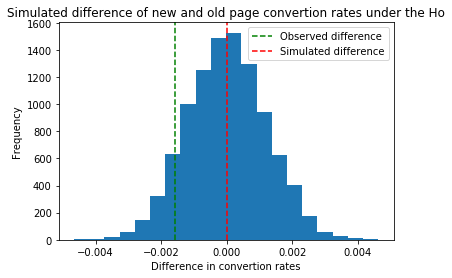

In [428]:
# plot a histogram
plt.hist(p_diffs, bins = 20);
plt.title("Simulated difference of new and old page convertion rates under the Ho");
plt.xlabel('Difference in convertion rates');
plt.ylabel('Frequency');
plt.axvline(x=obs_diff, color = 'g', linestyle = 'dashed', label = "Observed difference")
plt.axvline(x=simulated_diff, color = 'r', linestyle = 'dashed', label = "Simulated difference");
plt.legend();
# It looks like a normal distribution

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [429]:
(p_diffs > observed_diff).mean()
print("THE PROPORTION OF p_diffs WHICH ARE GREATER THAN THE OBSERVED DIFFERENCE IS %s" %(p_diffs > observed_diff).mean())

THE PROPORTION OF p_diffs WHICH ARE GREATER THAN THE OBSERVED DIFFERENCE IS 0.9082


In [430]:
(p_diffs_2nd_approach > observed_diff).mean()
print("THE PROPORTION OF p_diffs_2nd_approach WHICH ARE GREATER THAN THE OBSERVED DIFFERENCE IS %s" %(p_diffs_2nd_approach > observed_diff).mean())

THE PROPORTION OF p_diffs_2nd_approach WHICH ARE GREATER THAN THE OBSERVED DIFFERENCE IS 0.902


**As it can be seen, the results from different approaches are quite similar**

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In part j was computed the p-value that shows the probability of getting our statistic or more extreme value if the Ho is true** <br>
**The p-value > 0.05. It indicates that we FAIL TO REJECT the Ho hypothesis.** <br>
**In other words, our results are not statistically significant and there is no reason to switch to the new page** <br>
**Usually, in order to make a good business decision, the practical significance should be also considered** <br>
**However, in this particular situation this is not the case as we decide to keep the old page**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [431]:
import statsmodels.api as sm
# Calculate the number of conversions for both pages
convert_old = len(df2.query("landing_page == 'old_page' and converted == 1"))
convert_new = len(df2.query("landing_page == 'new_page' and converted == 1"))
# Calculate the number of individuals who received each page
n_old = len(df2.query("landing_page == 'old_page'"))
n_new = len(df2.query("landing_page == 'new_page'"))
print(convert_old, convert_new, n_old, n_new)

17489 17264 145274 145310


m. Then we use `stats.proportions_ztest` to compute our test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [433]:
# Calculate z-score and p-value
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
print("z-score:", z_score, "\np-value:", p_value)

z-score: 1.3109241984234394 
p-value: 0.9050583127590245


In [376]:
from scipy.stats import norm

norm.cdf(z_score), norm.ppf(1-(0.05/2))
# 0.9050583127590245 # Tells us how significant our z-score is

# 1.959963984540054 # Tells us what our critical value at 95% confidence is

(0.9050583127590245, 1.959963984540054)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**A z-score indicates the number of STDs an element is from the mean.** <br>
**The p-value calculated with using built-in functions is almost the same as from simulated values above** <br>
**Since the z-score of 1.3109241984234394 is less than the critical value of 1.959963984540054, we do NOT reject the null hypothesis that the difference between the two proportions is no different from zero.**


<a id='regression'></a>
### PART III - A REGRESSION APPROACH

`1.` In this final part, we will see that the result we acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. **Since each row is either a conversion or no conversion, we shouuld perform logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model we specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, first we need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [434]:
# adding dummy variable
df2["ab_page"] = pd.get_dummies(df2.group)["treatment"]
# adding intercept
df2["intercept"] = 1

In [435]:
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Then we use **statsmodels** to import a regression model.  Instantiate the model, and fit the model using the two columns we created in part **b.** to predict whether or not an individual converts.

In [436]:
log_mod = sm.Logit(df2.converted, df2[["intercept", "ab_page"]])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. The summary of regression is provided below

In [437]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 04 Nov 2018   Pseudo R-squ.:               8.077e-06
Time:                        23:20:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The null and alternative hypotheses in the regression approach are the following (two-sided test):**
$$H_0: p_{new} - p_{old} = 0$$
$$H_1:p_{new} - p_{old}\ne 70$$

**The p-value associated with new page is 0.190. The difference between this p-value and p-value calculated in the PART II is significant** <br>
**It is explained by the difference in the way how hypotheses were stated** <br>
**However, still p_value > 0.05 which indicates that our result is non-significant** <br>
**So, we also fail to reject the Ho and make a conclusion that the type of page doesn't make an impact on convertion rates**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**There are some other things that might influence the convertion rates and they should be added to the regression model also.** <br>
**For example, we can add a type of students (whether a new one or he is a returning client). This is important as might create a change aversion or novelty effect.** <br>
**There are a plenty of other factors that would be interesting to investigate. They are the following:**
- type of a course;
- educational background;
- time spent on the page;
- purpose of taking the course. <br>

**As well as benefits, the new variables in regression model can bring some disadvantages also. These are the following:**
- adding an irrelevant variable leads to increasing of bias and will not bring any benefits
- there is a possibility of multicollinearity

g. Now along with testing if the conversion rate changes for different pages, also we add an effect based on which country a user lives. We will need to read in the **countries.csv** dataset and merge together datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns -  Provide the statistical output as well as a written response to answer this question.

In [438]:
# Loading a dataset
countries_df = pd.read_csv(r"D:\2018_TIME_TO_CHANGE\UDACITY\PART 3 (Practical Statistics)\Project\countries.csv")
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [439]:
# Merging datasets on the appropriate rows (particularly user_id)
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [440]:
# check what countries we have in our dataset
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [441]:
# Create dummy variables for countries
df_new[["CA", "US"]] = pd.get_dummies(df_new.country)[["CA", "US"]]
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0


In [442]:
# import and fit the model
log_mod = sm.Logit(df_new.converted, df_new[["intercept", "CA", "US"]])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 04 Nov 2018   Pseudo R-squ.:               1.521e-05
Time:                        23:24:24   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

**The results summary shows that countries don't make a significant impact on conversion rates because the results are not  statistically significant as p-value is also higher than 0.05**

h. Though we have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and conclusions based on the results.

In [445]:
# Import and fit the model
df_new["intercept"] = 1
log_mod = sm.Logit(df_new.converted, df_new[["intercept", "ab_page", "US", "CA"]])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [446]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sun, 04 Nov 2018   Pseudo R-squ.:               2.323e-05
Time:                        23:26:58   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
==============================================================================
"""

**P-values of countries and new page still are more than 0.05 which indicates that these results are non-statistically significant. So, we can't conclude that these parameters make an impact on conversion rates**

In [447]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0

<a id='conclusions'></a>
### CONCLUSIONS

The conducted analysis allows to make the following conclusions:
1. There is no statistically significant evidence that the new page is better than the old one.
2. Actually, the given data revealed that average conversion rate on the new page was even slightly lower comparing to the same metric on the old one.
3. So, we can make a conclusion that it's better to keep the old page. This decision can be supported from the practical point of view as there is no evidence that the new page brings better results but at the same implementation of a new page might involve some additional resources of the company.
4. Finally, in order to make a more precise investigation, some other variables might be considered in the analysis such as:
 - type of a course;
 - time spent on the page;
 - purpose of taking the course;
 - educational background of a student.